## Jorge Bueno Perez - 419034

## Prediction of the average price of the Spanish rail tickets data 

In [17]:
import numpy as np
import pandas as pd
import os
import time
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import r2_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split, RepeatedKFold, GridSearchCV
import joblib

In [18]:
renfe = pd.read_csv("~/Desktop/Projects/DL/Regression/Before_modeling/Datasets/renfe2.csv")

In [19]:
X = renfe.drop(["price"],1).astype(int) #Feature Matrix
y = renfe["price"] #Target Variable

In [20]:
X_train = pd.read_csv("~/Desktop/Projects/DL/Regression/Modeling/data_splits/X_train.csv")
X_test = pd.read_csv("~/Desktop/Projects/DL/Regression/Modeling/data_splits/X_test.csv")
y_train = pd.read_csv("~/Desktop/Projects/DL/Regression/Modeling/data_splits/y_train.csv")
y_test = pd.read_csv("~/Desktop/Projects/DL/Regression/Modeling/data_splits/y_test.csv")

# 1) `Model with Cross Validation` - `Boosting`

In [35]:
model = GradientBoostingRegressor(n_estimators=500,  random_state=123)

In [36]:
model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 14,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 123,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

## 1.1) `Training` model

### This model is going to be `tuned` with different parameters of `max depth`, [6, 8 ... 16]

In [6]:
params = {'max_depth': [6, 8, 10, 12, 14, 16]}

boosting_regressor_grid = GridSearchCV(model, cv=3, n_jobs=-1)
boosting_regressor_grid.fit(X_train, y_train)

print('Best Parameters : ',boosting_regressor_grid.best_params_)

/Users/Lajobu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Best Parameters :  {'max_depth': 8}


### It seems the best model has the `max depth` equal to `8`

In [39]:
joblib.dump(boosting_regressor_grid, "boosting_regressor_grid.sav")

['boosting_regressor_grid.sav']

In [38]:
boosting_regressor_grid = joblib.load("boosting_regressor_grid.sav")

## 1.2) `Prediction on the test sample`

In [40]:
y_pred = boosting_regressor_grid.predict(X_test)

In [41]:
print('Mean Absolute Error', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error 6.1461440171821025


In [42]:
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error 10.902862127593613


In [43]:
print('R Squared Score is:', r2_score(y_test, y_pred))

R Squared Score is: 0.8591594976343981


## 1.3) `Prediction on the train sample`

In [48]:
y_pred_ = boosting_regressor_grid.predict(X_train)

In [49]:
print('Mean Absolute Error', metrics.mean_absolute_error(y_train, y_pred_))

Mean Absolute Error 5.706856650778035


In [50]:
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_train, y_pred_)))

Root Mean Squared Error 10.23421552336697


In [51]:
print('R Squared Score is:', r2_score(y_train, y_pred_))

R Squared Score is: 0.8773288580226849


## 1.4) `Graphical results`

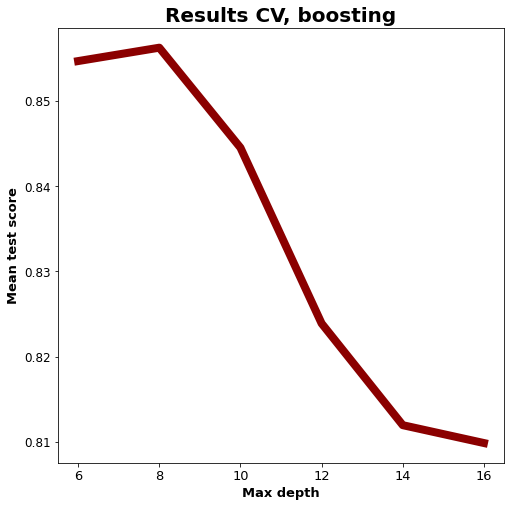

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(boosting_regressor_grid.cv_results_['param_max_depth'].tolist(), (boosting_regressor_grid.cv_results_['mean_test_score']).tolist(), lw=8, color= "darkred")
ax.set_title("Results CV, boosting", fontsize=20, fontweight="bold")
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=12)
plt.xlabel('Max depth', fontsize=13, fontweight="bold")
plt.ylabel('Mean test score', fontsize=13, fontweight="bold")
fig.savefig('Figures/cv_boosting.png')
plt.show()

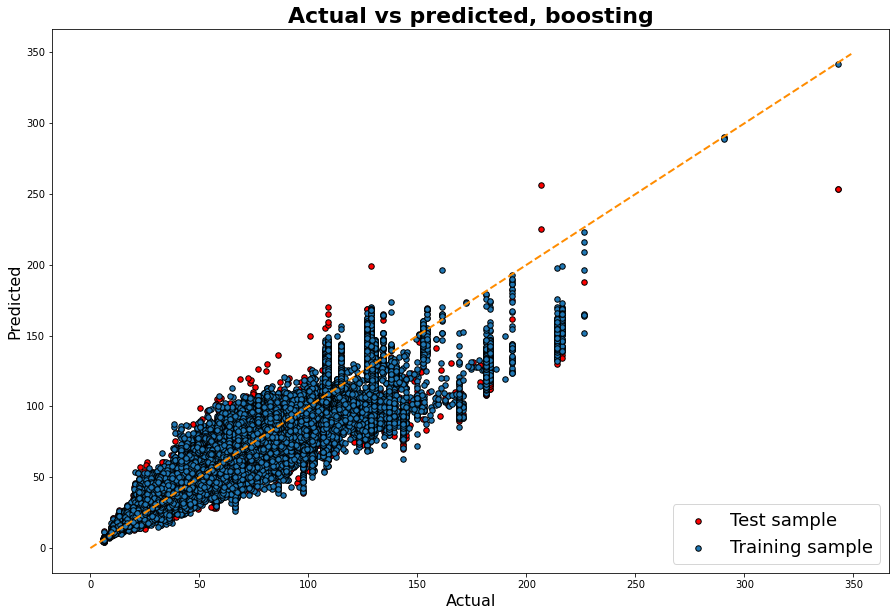

In [61]:
import matplotlib.pyplot as plt
fig, (ax1) = plt.subplots(figsize=(15,10))

plt.title('Actual vs predicted, boosting', fontsize=22,
            fontweight='bold')

ax1.scatter(y_test, y_pred, edgecolors=(0, 0, 0), color= "red", s=30, label='Test sample')
ax1.plot(range(350), 'k--', lw=2, color= "darkorange")
ax1.set_xlabel('Actual', fontsize=16)
ax1.set_ylabel('Predicted', fontsize=16)

ax1.scatter(y_train, y_pred_, edgecolors=(0, 0, 0), s=30,label='Training sample')

ax1.legend(loc=4, fontsize=18)
plt.show() 
fig.savefig('Figures/cv_pred_err_boost.png')

# 2) `Conclusions`

### The best parameter for the model is `max depth` equal to `8`
### It seems there is `not a lot of difference` between the `R squared score` of the `test` and `training` samples
### In order to compare the models  `R squared score of the test sample` will be taken, which is equal to `85.92%`